In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verification of Temperature

In [6]:
dfDay["Temp_Avg"].describe()

count    3242.000000
mean       17.600482
std         2.691010
min         7.102895
25%        15.833456
50%        17.731101
75%        19.252424
max        32.322439
Name: Temp_Avg, dtype: float64

In [7]:
dfDay["Temp_Avg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: Temp_Avg
Non-Null Count  Dtype  
--------------  -----  
3242 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [10]:
dfClean = dfDay[dfDay["Temp_Avg"].notna()]

In [12]:
dfClean["Temp_Avg"].info()

<class 'pandas.core.series.Series'>
Index: 3242 entries, 17 to 3451
Series name: Temp_Avg
Non-Null Count  Dtype  
--------------  -----  
3242 non-null   float64
dtypes: float64(1)
memory usage: 50.7 KB


In [118]:
full_range = pd.date_range(start=dfClean["Time"].min(), end=dfClean["Time"].max(), freq='D')
dfFull = pd.DataFrame(full_range, columns=["Time"])
dfFinal = dfFull.merge(dfClean, on="Time", how="left")

In [99]:
dfFinal["Temp_Avg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3450 entries, 0 to 3449
Series name: Temp_Avg
Non-Null Count  Dtype  
--------------  -----  
3242 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [120]:
dfFinal["SMA7"] = dfFinal["Temp_Avg"].rolling(window=7, min_periods=1).mean()
dfFinal["SMA30"] = dfFinal["Temp_Avg"].rolling(window=30, min_periods=1).mean()

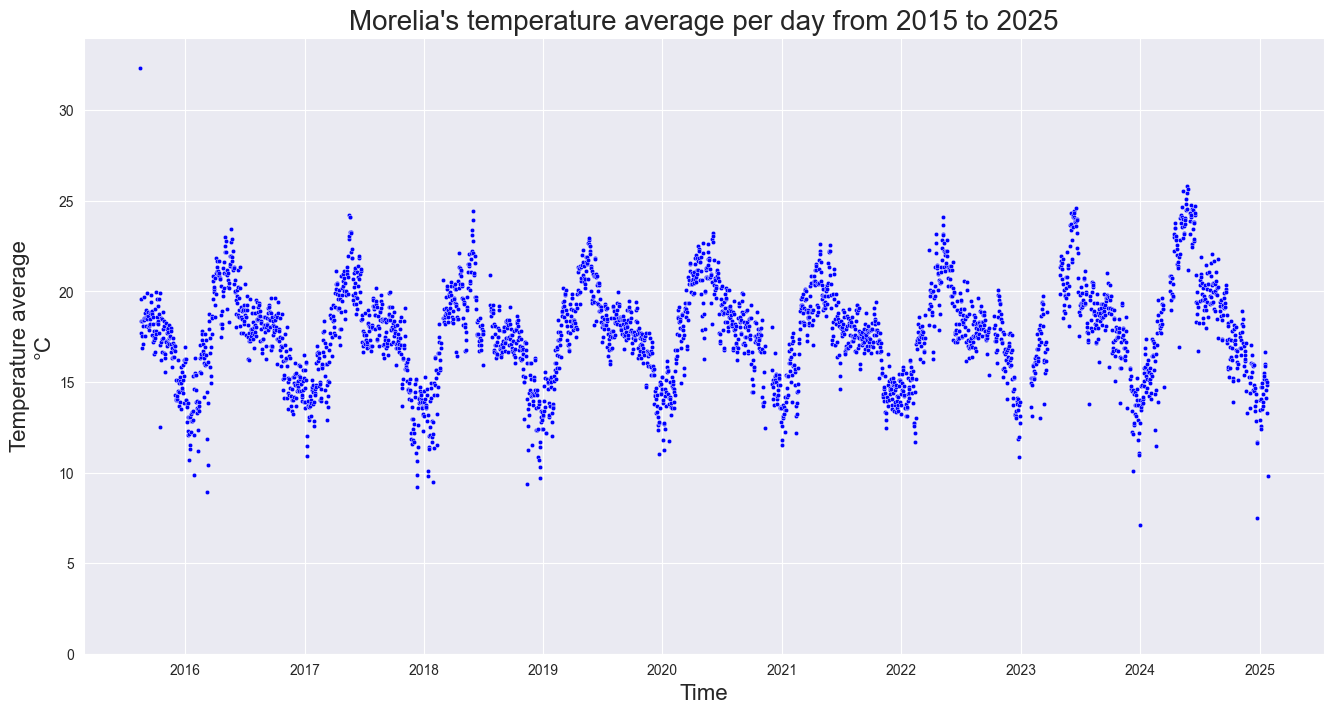

In [8]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["Temp_Avg"], s=10, color="blue")
plt.ylim(0, 34)
plt.ylabel("Temperature average\n°C", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's temperature average per day from 2015 to 2025", size=20)
plt.show()

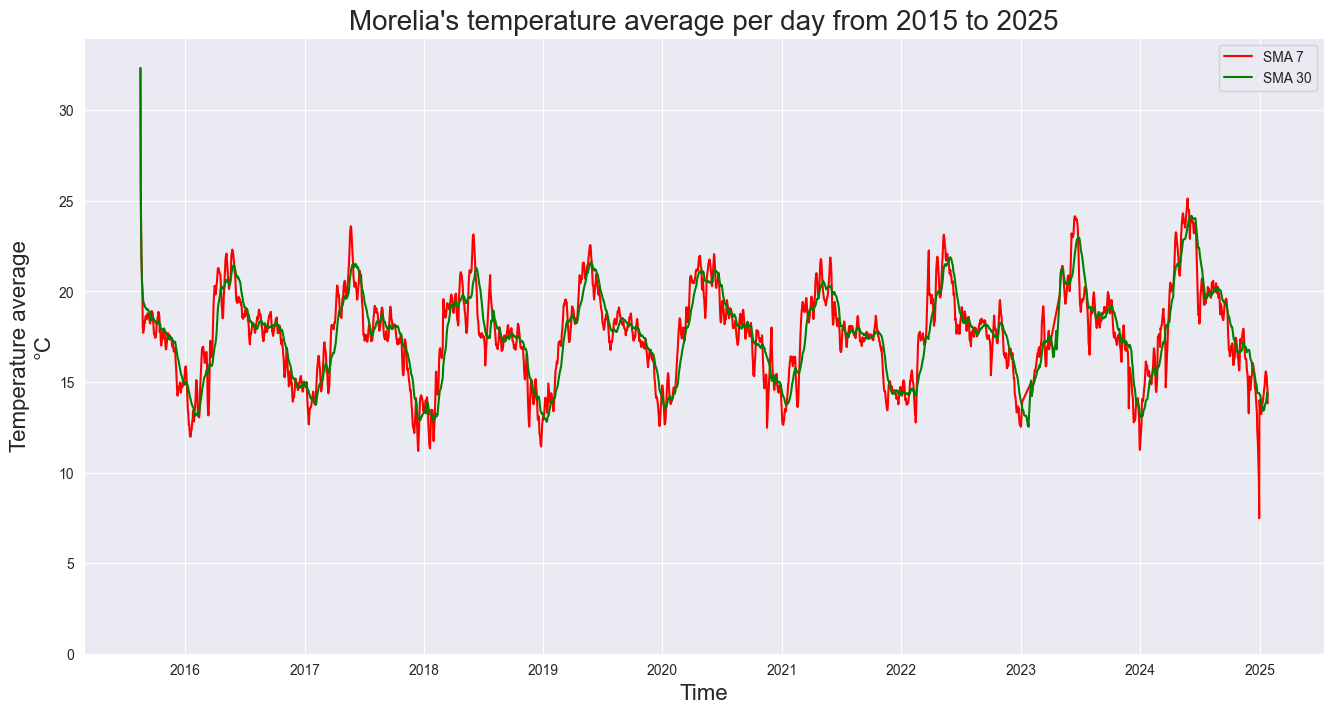

In [134]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=dfFinal["Time"], y=dfFinal["SMA7"], color="red", label="SMA 7")
sns.lineplot(x=dfFinal["Time"], y=dfFinal["SMA30"], color="green", label="SMA 30")
plt.ylim(0, 34)
plt.ylabel("Temperature average\n°C", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's temperature average per day from 2015 to 2025", size=20)
plt.legend()
plt.show()